Surveillance

In [2]:
import ehrapy as ep
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tableone import TableOne
from anndata import AnnData

import warnings

warnings.filterwarnings("ignore")

In [3]:
adata = ep.dt.diabetes_130_fairlearn()
ep.ad.move_to_obs(adata, ["race", "gender", "age"], copy_obs=True)

Output()

AnnData object with n_obs × n_vars = 101766 × 24
    obs: 'race', 'gender', 'age'
    var: 'ehrapy_column_type'
    layers: 'original'

In [4]:
ep.ad.move_to_obs(adata, ["A1Cresult", "admission_source_id"], copy_obs=True)
adata.obs["A1Cresult_measured"] = ~adata.obs["A1Cresult"].isna()

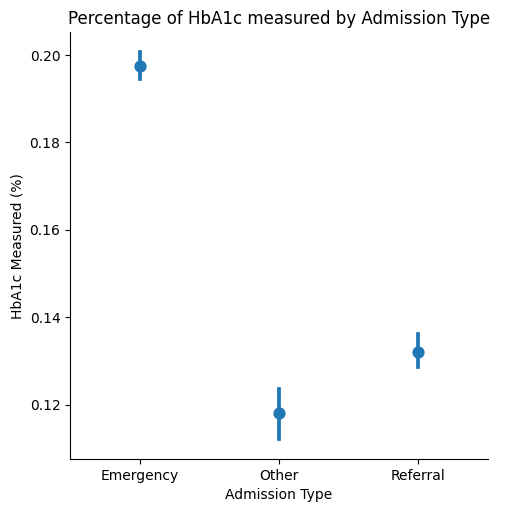

In [10]:
sns.catplot(
    y="A1Cresult_measured",
    x="admission_source_id",
    data=adata.obs,
    kind="point",
    ci=95,
    dodge=True,
    join=False,
)
plt.xlabel("Admission Type")
plt.ylabel("HbA1c Measured (%)")
plt.title("Percentage of HbA1c measured by Admission Type")
plt.savefig("hba1c_admission_type.png", dpi=300, bbox_inches="tight")
plt.show()
